Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import os
from google.colab import drive, files
import seaborn as sns

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
path_to_file = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [4]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv(path_to_file)
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [71]:
df1 = df.copy()

In [72]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Axes: >

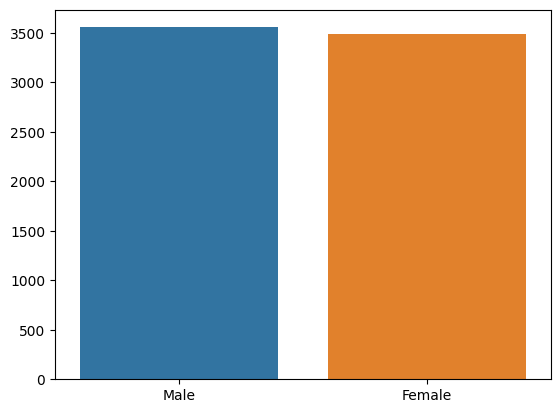

In [73]:
sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts().values)

##### 2. Какое количество уникальных значений у поля InternetService?

In [74]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [75]:
try:
    print(df['TotalCharges'].median())
except:
    print("Error median")
try:
    print(df['TotalCharges'].mean())
except:
    print("Error mean")
try:
    print(df['TotalCharges'].std())
except:
    print("Error std")

Error median
Error mean
Error std


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [76]:
df.replace({"PhoneService": {"Yes": 1, "No": 0}}, inplace=True)

In [77]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [78]:
df.replace({"TotalCharges":{" ": np.nan}}, inplace=True)

In [79]:
df["TotalCharges"].fillna(0, inplace=True)

In [80]:
df["TotalCharges"] = df["TotalCharges"].astype(np.float32)

In [81]:
df["TotalCharges"]

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

In [82]:
print("Median = ", df["TotalCharges"].median())
print("Mean = ", df["TotalCharges"].mean())
print("STD = ", df["TotalCharges"].std())

Median =  1394.55
Mean =  2279.7344
STD =  2266.7944


##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [83]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [84]:
df.replace({"Churn":{"Yes": 1, "No": 0}}, inplace=True)

In [85]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [86]:
df.replace({"StreamingMovies" : {"Yes": 1, "No": 0, "No internet service": 0},
            "StreamingTV" : {"Yes": 1, "No": 0, "No internet service": 0},
            "TechSupport" : {"Yes": 1, "No": 0, "No internet service": 0}},
           inplace=True)

In [87]:
df[["StreamingMovies", "StreamingTV", "TechSupport"]].value_counts()

StreamingMovies  StreamingTV  TechSupport
0                0            0              3002
1                1            0               996
                              1               944
0                0            1               542
1                0            0               508
0                1            0               493
1                0            1               284
0                1            1               274
dtype: int64

##### 8. Заполните пропуски в поле PhoneService значением 0

In [88]:
print("None is missing") if df['PhoneService'].isna().sum() == 0 else df['PhoneService'].isna().sum()

None is missing


##### Проверим признак PhoneService на содержание значений содержащих пробельный символ

In [89]:
df['PhoneService'].replace(r"^\s*$", 0).value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [90]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges',
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns]

In [91]:
df.columns

Index(['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'Churn'],
      dtype='object')

##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [92]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=13)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [94]:
gender.fit_transform(x_train, y_train)

,gender_Female,gender_Male
2570,0,1
5816,1,0
1090,1,0
4750,0,1
1475,1,0
...,...,...
866,0,1
2790,1,0
74,1,0
6320,1,0


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [95]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [96]:
#Ваш код здесь
TotalCharges = Pipeline([("selector", NumberSelector(key="TotalCharges")),
                          ("standart", StandardScaler())])

Объединение всех "кубиков" очень легко сделать таким образом

In [97]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV',
                                                 'TechSupport']))
            ])

In [98]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standart',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key=['PhoneService',
                                                                                      'StreamingMovies',
                                                                                      'StreamingTV',
                                                                                      'TechSupport']))])),
                                                ('gender',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='gender')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='gender'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [116]:
#Ваш код здесь
y_pred = pipeline.predict_proba(x_test)
y_pred

array([[0.94, 0.06],
       [0.98, 0.02],
       [0.51, 0.49],
       ...,
       [0.39, 0.61],
       [0.02, 0.98],
       [0.46, 0.54]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [121]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
loss = log_loss(y_test, y_pred)
ROC = roc_auc_score(y_test, y_pred[:,1])
print("Loss = ", loss)
print("ROC = ", ROC)

Loss =  0.9181987915016441
ROC =  0.7731941595652451


### Сохраним наш пайплайн

In [124]:
import pickle

In [126]:
with open("/content/drive/MyDrive/model_RF.dill", "wb") as f:
    pickle.dump(pipeline, f)